## Outlier Detection using  SVM for one-class
### Edgar Acuna
### Dataset: Diabetes
### Edgar Acuna

In [116]:
import numpy as np
import pandas as pd
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager


In [117]:
# Get data
url= "https://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
yd=data['class']
Xd1=data[data['class']==1]
Xd2=data[data['class']==2]
print(Xd1.shape)
print(Xd2.shape)

(500, 9)
(268, 9)


In [118]:
Xd1=Xd1.iloc[:,0:8]
Xd2=Xd2.iloc[:,0:8]
scaler = StandardScaler()
scaler.fit(Xd1)

StandardScaler()

### Outlier Detection in class 1

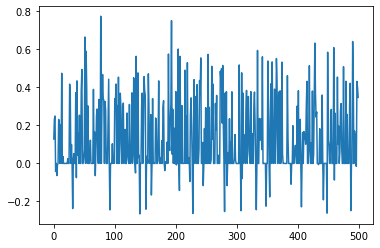

In [119]:
Xdf1 = pd.DataFrame(scaler.transform(Xd1), index=Xd1.index)
#print(Xdf1)
clf=OneClassSVM(nu=0.25, gamma=0.5)
clf.fit(Xdf1)
Z1 = clf.decision_function(Xdf1)
plt.plot(Z1)

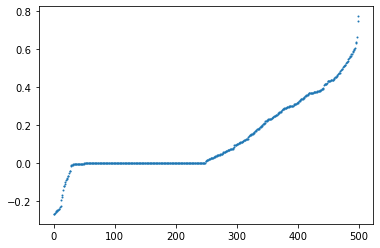

In [120]:
plt.plot(np.sort(Z1),marker='.',linestyle='None',markersize = 2.0)

<AxesSubplot:>

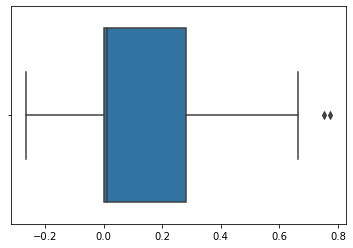

In [121]:
import seaborn as sns
sns.boxplot(x=Z1)

In [122]:
Z11=pd.Series(Z1,index=Xd1.index)
outs1= Z11[Z11 < -0.1]
print(outs1)

58    -0.237472
145   -0.244297
228   -0.265369
247   -0.240638
258   -0.165988
336   -0.142157
371   -0.263188
395   -0.116712
453   -0.253123
459   -0.116833
487   -0.248689
519   -0.243360
537   -0.224699
549   -0.175817
596   -0.109394
622   -0.228326
673   -0.191288
684   -0.261284
744   -0.248182
dtype: float64


In [123]:
pred=clf.predict(Xdf1)
inst1=Xdf1.index
outsvm1=inst1[np.where(pred==-1)]
print(len(outsvm1))

146


### Outlier Detection in class 2 of Diabetes

In [124]:
scaler = StandardScaler()
scaler.fit(Xd2)
Xdf2 = pd.DataFrame(scaler.transform(Xd2), index=Xd2.index)
#print(Xdf2)
clf=OneClassSVM(nu=0.05, gamma=0.1)
clf.fit(Xdf2)
Z2 = clf.decision_function(Xdf2)
Z12=pd.Series(Z2,index=Xdf2.index)
outs2= Z12[Z12 < -0.1]
print(outs2.index)

Int64Index([], dtype='int64')


In [125]:
pred=clf.predict(Xdf2)

In [126]:
inst=Xdf2.index
outsvm2=inst[np.where(pred==-1)]
print(outsvm2)

Int64Index([  4,   9, 124, 159, 177, 187, 254, 332, 357, 370, 375, 397, 408,
            445, 595, 604, 659, 691, 731, 753, 759],
           dtype='int64')


### Shuttle

In [127]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_table(url, header=None,delim_whitespace=True)

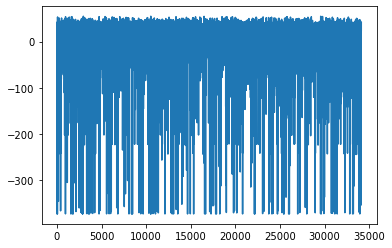

In [128]:
y1=data.iloc[:,9]
X1=data[y1==1]
X1=X1.iloc[:,0:9]
scaler = StandardScaler()
scaler.fit(X1)
Xdf1 = pd.DataFrame(scaler.transform(X1), index=X1.index)
#print(Xdf1)
clf=OneClassSVM(nu=0.15, gamma=0.5)
clf.fit(Xdf1)
Z1 = clf.decision_function(Xdf1)
plt.plot(Z1)

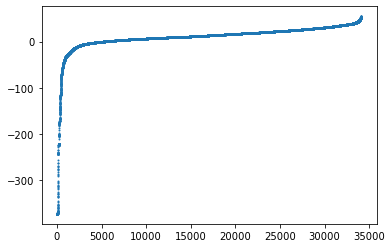

In [129]:
plt.plot(np.sort(Z1),marker='.',linestyle='None',markersize = 2.0)

In [130]:
Z11=pd.Series(Z1,index=X1.index)
outs1= Z11[Z11 < -372.3]
print(outs1)

19      -372.313809
70      -372.316630
2174    -372.316630
2294    -372.316630
3620    -372.316630
3653    -372.311447
4540    -372.316630
6004    -372.316630
8688    -372.316630
10303   -372.316630
10730   -372.316630
10808   -372.316000
12289   -372.316247
13388   -372.316526
13430   -372.316630
14059   -372.316630
15411   -372.314981
16434   -372.315984
17207   -372.316630
18624   -372.316630
19474   -372.316630
21207   -372.316630
21995   -372.316630
22645   -372.316630
22736   -372.316630
23224   -372.316630
26492   -372.314876
28212   -372.316613
28275   -372.316518
30247   -372.308927
30721   -372.316630
31474   -372.316630
32422   -372.316630
33095   -372.316630
33182   -372.316630
34429   -372.310156
35729   -372.316630
41854   -372.316630
42284   -372.316619
43289   -372.316629
dtype: float64


In [131]:
pred=clf.predict(Xdf1)
inst1=Xdf1.index
outsvm1=inst1[np.where(pred==-1)]
print(len(outsvm1))

5114
